In [18]:
%load_ext dotenv
%dotenv

In [19]:
import os

QUERY = """query AprilSigs($tokenId: Int!, $interval: String!) {
  signals(
    tokenId: $tokenId
    from: "2025-04-01T00:00:00Z"
    to: "2025-04-07T00:00:00Z"
    interval: $interval
  ) {
    DateTime: timestamp
    Speed: speed(agg: AVG)
    Odometer: powertrainTransmissionTravelledDistance(agg: AVG)
    SoC: powertrainTractionBatteryStateOfChargeCurrent(agg: AVG)
    V: powertrainTractionBatteryChargingChargeVoltageUnknownType(agg: AVG)
    I: powertrainTractionBatteryChargingChargeCurrentAC(agg: AVG)
    Q: powertrainTractionBatteryGrossCapacity(agg: AVG)
    P: powertrainTractionBatteryCurrentPower(agg: AVG)
    IsCharging: powertrainTractionBatteryChargingIsCharging(agg: MAX)
    AmbT: exteriorAirTemperature(agg: AVG)
  }
}"""

TOKEN_ID = 118128
INTERVAL = "1s"
QUERY_URL = os.environ.get("QUERY_URL", "https://identity-api.dimo.zone/query")
AUTH_TOKEN = os.environ.get("AUTH_TOKEN")

In [20]:
import requests

resp = requests.post(
    QUERY_URL,
    json={"query": QUERY, "variables": {"tokenId": TOKEN_ID, "interval": INTERVAL}},
    headers={
        "Authorization": "Bearer " + AUTH_TOKEN,
    },
)

assert resp.status_code == 200, "Request failed"

In [21]:
import pandas as pd

df = pd.DataFrame.from_records(resp.json()["data"]["signals"])

df["DateTime"] = pd.to_datetime(df["DateTime"])

In [22]:
volt_df = df[["DateTime", "V"]]
vold_df = volt_df.dropna()

print(f"Have {len(vold_df)} rows")

Have 344 rows


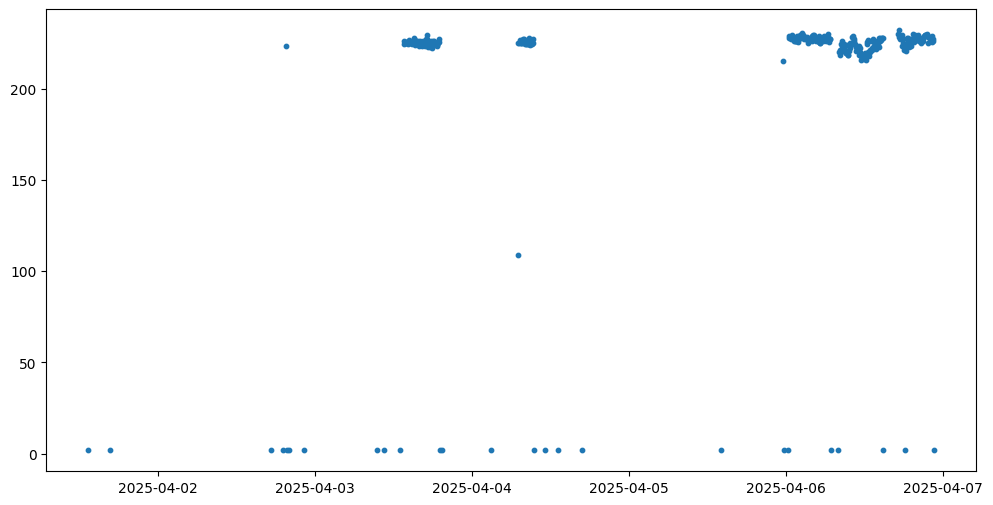

In [ ]:
import matplotlib.pyplot as plt

plt.title(f"Voltage with interval {INTERVAL}")
plt.figure(figsize=(12, 6))
plt.scatter(volt_df["DateTime"], volt_df["V"], s=10)